In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#getting all categorical values
cat_col=list(df.select_dtypes(['object']).columns)
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
df_base = df.drop(cat_col,axis=1)
df_base.dropna(inplace=True)

In [8]:
y=df_base['SalePrice']
X=df_base.drop('SalePrice',axis=1)
df_test_base = df_test.drop(cat_col,axis=1)
df_test_base.dropna(inplace=True)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=100)
lr.fit(X, y)
lr_pred = lr.predict(df_test_base)
print(lr.score(X, y))


0.8095558023576824


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
print(regr.score(X,y))

0.7011743700075255


In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
is_null = pd.isnull(df).sum()
print(is_null)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


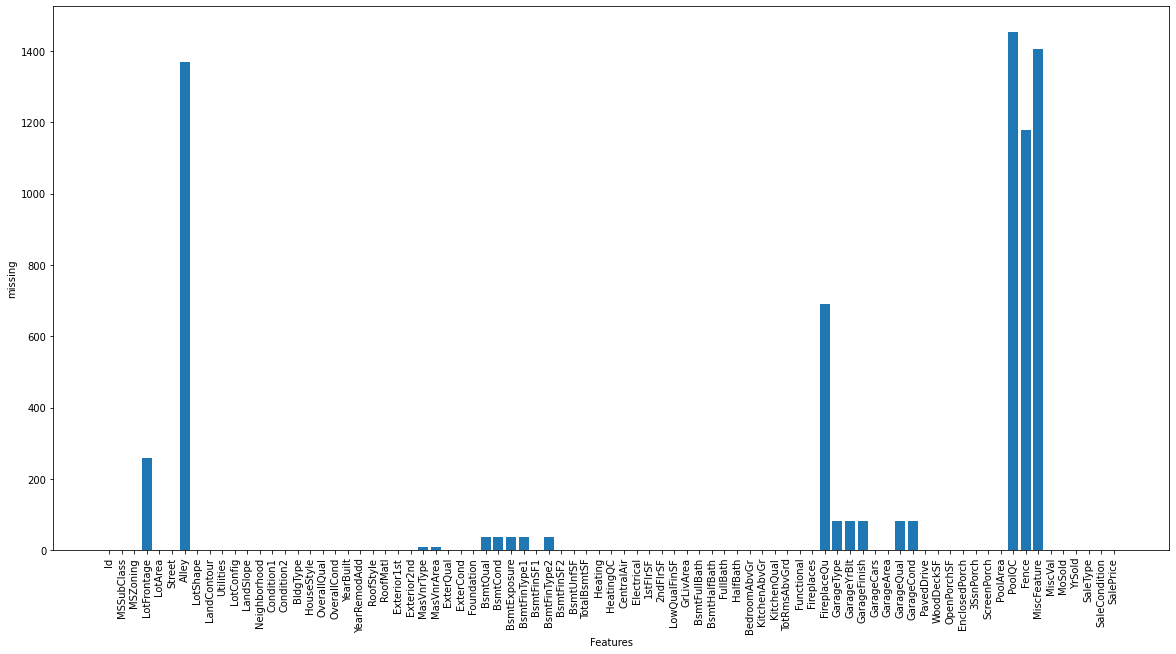

In [13]:
null = df.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(df.columns))), list(df.columns.values), rotation='vertical')
plt.show

print(null)

In [14]:
df=df.drop(['Id','FireplaceQu','Fence','Alley','MiscFeature','PoolQC'], axis=1)

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
cat_col=list(df.select_dtypes(['object']).columns)
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [17]:
for i in df:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
orden = OrdinalEncoder()
for i in cat_col:
    df[i] = orden.fit_transform(df[[i]])

In [19]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000


In [20]:
is_null = pd.isnull(df_test).sum()
print(is_null)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


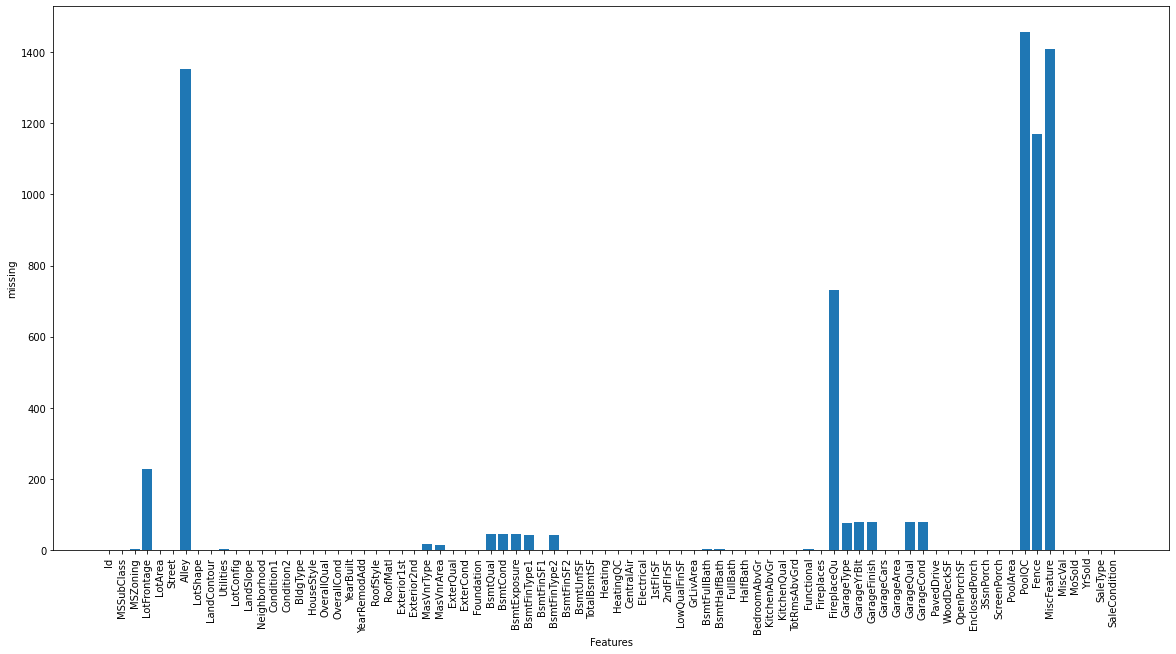

In [21]:
null = df_test.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(df_test.columns))), list(df_test.columns.values), rotation='vertical')
plt.show

print(null)

In [22]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
id_col = df_test['Id']


In [24]:
df_test.drop(['Id','FireplaceQu','Fence','Alley','MiscFeature','PoolQC'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [25]:
for i in df_test:
    df_test[i].fillna(df_test[i].mode()[0], inplace=True)

In [26]:
cat_col_test=list(df_test.select_dtypes(['object']).columns)
cat_col_test

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
for i in cat_col_test:
    df_test[i] = orden.fit_transform(df_test[[i]])

In [28]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2.0,80.0,11622,1.0,0.0,3.0,3.0,0.0,...,120,0,0.0,2.0,2.0,0,6,2010,8.0,4.0
1,1462,20,3.0,81.0,14267,1.0,0.0,0.0,3.0,0.0,...,0,0,0.0,2.0,0.0,12500,6,2010,8.0,4.0
2,1463,60,3.0,74.0,13830,1.0,0.0,0.0,3.0,0.0,...,0,0,0.0,2.0,2.0,0,3,2010,8.0,4.0
3,1464,60,3.0,78.0,9978,1.0,0.0,0.0,3.0,0.0,...,0,0,0.0,2.0,2.0,0,6,2010,8.0,4.0
4,1465,120,3.0,43.0,5005,1.0,0.0,0.0,1.0,0.0,...,144,0,0.0,2.0,2.0,0,1,2010,8.0,4.0


In [29]:
y = df['SalePrice']
X = pd.get_dummies(df.drop('SalePrice', axis=1))

In [30]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [31]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,61,0,0,0,0,0,2,2008,8.0,4.0
1,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,0,5,2007,8.0,4.0
2,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,42,0,0,0,0,0,9,2008,8.0,4.0
3,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,35,272,0,0,0,0,2,2006,8.0,0.0
4,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,84,0,0,0,0,0,12,2008,8.0,4.0


In [32]:
df_test.drop(['Id','FireplaceQu','Fence','Alley','MiscFeature','PoolQC'],axis=1,inplace=True)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=100)
lr.fit(X, y)
lr_pred = lr.predict(df_test)
print(lr.score(X, y))

0.8492771272303437


In [34]:
iddf = pd.DataFrame(id_col,columns=['Id'])
lr_pred_df = pd.DataFrame(lr_pred,columns=['SalePrice'])
frames=[iddf,lr_pred_df]
res = pd.concat(frames,axis=1)
# y_test = pd.DataFrame([id_col,lr_pred],columns=['Id','SalePrice'])

In [35]:
res.to_csv('y_test_result.csv',index=False)

In [36]:
# y_test.to_csv('y_test.csv')

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
print(regr.score(X,y))


0.7011444101275295
